In [5]:
sys.path.append("../common")

In [12]:
from process import CosmicProcessor 
cosmic_processor = CosmicProcessor(
    # defname = "nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.root",
    # file_name = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00050440.root",
    file_list_path = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.0_99.txt",
    use_remote = True, 
    cuts_to_toggle = {
        # Single parameter OFF
        "has_hits": False,
        "within_lhr_max": False, 
        "within_d0": False,  
        "within_pitch_angle": False,  
        # Two parameters OFF
        "good_trkqual": False,
        "unvetoed" : False,
        "within_ext_win" : False,
        "within_sig_win" : False
        
    } 
)
results = cosmic_processor.execute()

[Skeleton] ⭐️ Skeleton init
[CosmicProcessor] ✅ Initialised with:
        	defname         = None
        	file_list_path  = /exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.0_99.txt
        	file_name       = None
        	cutset_name     = alpha
        	on_spill        = False
        	cuts_to_toggle  = {'has_hits': False, 'within_lhr_max': False, 'within_d0': False, 'within_pitch_angle': False, 'good_trkqual': False, 'unvetoed': False, 'within_ext_win': False, 'within_sig_win': False}
        	branches        = ['evt', 'crv', 'trk', 'trkfit', 'trkmc']
        	use_remote      = True
        	location        = disk
        	max_workers     = 50
        	verbosity       = 2
        	use_processes   = True
[CosmicProcessor] ⭐️ Starting analysis
[pyprocess] ⭐️ Initialised Processor:
	path = 'EventNtuple/ntuple'
	use_remote = True
	location = disk
	schema = root
	verbosity=2
[pyprocess] ⭐️ Loading file list from /e

Processing: 100%|██████████████████████████████| 100/100 [01:02<00:00,  1.59file/s, successful=100, failed=0]

[pyprocess] ⭐️ Returning 100 results
[CosmicProcessor] ✅ Analysis complete


In [13]:
from postprocess import PostProcess 
postprocessor = PostProcess(info=True)
data, hists, stats, info = postprocessor.execute(results)

[PostProcess] ⭐️ Initialised
[PostProcess] ✅ Combined arrays, result contains 104277 events
[PostProcess] ✅ Combined 4 histograms over 100 results
[PostProcess] ✅ Combined cut statistics
[PostProcess] ✅ Retrieved background event info
[PostProcess] ✅ Postprocessing complete:
	returning tuple of combined arrays, combined histograms, and combined cut stats


In [53]:
help(plotter.plot_1D)

Help on method plot_1D in module pyutils.pyplot:

plot_1D(array, nbins=100, xmin=-1.0, xmax=1.0, weights=None, title=None, xlabel=None, ylabel=None, col='black', leg_pos='best', out_path=None, dpi=300, log_x=False, log_y=False, norm_by_area=False, under_over=False, stat_box=True, stat_box_errors=False, error_bars=False, ax=None, show=True) method of pyutils.pyplot.Plot instance
    Create a 1D histogram from an array of values.

    Args:
      array (np.ndarray): Input data array
      weights (np.ndarray, optional): Weights for each value
      nbins (int, optional): Number of bins. Defaults to 100
      xmin (float, optional): Minimum x-axis value. Defaults to -1.0
      xmax (float, optional): Maximum x-axis value. Defaults to 1.0
      title (str, optional): Plot title
      xlabel (str, optional): X-axis label
      ylabel (str, optional): Y-axis label
      col (str, optional): Histogram color. Defaults to "black"
      leg_pos (str, optional): Legend position. Defaults to "best

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyplot] ✅ Wrote:
	../../img/comp/h1_offspill_CRY_as_trkqual.png


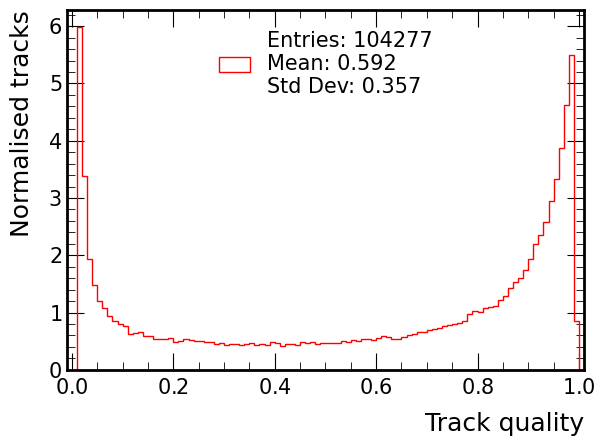

In [85]:
from pyutils.pyplot import Plot

plotter = Plot()

plotter.plot_1D(
    ak.flatten(data["trk"]["trkqual.result"], axis=None),
    nbins = 102,
    xmin = -0.01, 
    xmax = 1.01,
    col = "red",
    norm_by_area = True,
    xlabel = "Track quality",
    ylabel = "Normalised tracks",
    out_path = "../../img/comp/h1_offspill_CRY_as_trkqual.png"
)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyplot] ✅ Wrote:
	../../img/comp/h1_offspill_CRY_as_t0err.png


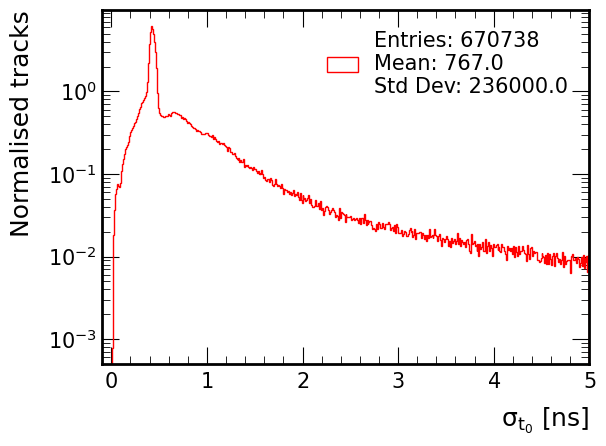

In [84]:
from pyutils.pyplot import Plot

plotter = Plot()

plotter.plot_1D(
    ak.flatten(data["trkfit"]["trksegpars_lh"]["t0err"], axis=None),
    nbins = 510,
    xmin = -0.1, 
    xmax = 5,
    col = "red",
    xlabel = r"$\sigma_{t_{0}}$ [ns]",
    ylabel = "Normalised tracks",
    norm_by_area = True,
    log_y = True,
    out_path = "../../img/comp/h1_offspill_CRY_as_t0err.png"
)

In [78]:
stats

[{'name': 'No cuts',
  'active': 'N/A',
  'description': 'No selection applied',
  'events_passing': 705770,
  'absolute_frac': 100.0,
  'relative_frac': 100.0},
 {'name': 'is_reco_electron',
  'description': 'Electron track fits',
  'events_passing': 656602,
  'absolute_frac': 93.03342448673081,
  'relative_frac': 93.03342448673081},
 {'name': 'has_trk_front',
  'description': 'Tracks intersect tracker entrance',
  'events_passing': 643746,
  'absolute_frac': 91.21186788897234,
  'relative_frac': 98.04204068827083},
 {'name': 'is_downstream',
  'description': 'Downstream tracks (p_z > 0 at tracker entrance)',
  'events_passing': 399663,
  'absolute_frac': 56.62793828017626,
  'relative_frac': 62.083958579936805},
 {'name': 'is_truth_electron',
  'description': 'Track parents are electrons (truth PID)',
  'events_passing': 173904,
  'absolute_frac': 24.64032191790527,
  'relative_frac': 43.51265941555761},
 {'name': 'one_reco_electron',
  'description': 'One reco electron / event',
  '

In [83]:
print(cosmic_processor.analyse.active_cuts)

# import pandas as pd

# # cuts_dict = {'is_reco_electron': True, 'has_trk_front': True, ./..}

# # Single row with cuts as columns
df = pd.DataFrame(stats)
display(df.round(3))
# # Or cuts as rows (more readable)
# df = pd.DataFrame.from_dict(cosmic_processor.analyse.active_cuts, orient='index', columns=['Active'])

{'is_reco_electron': True, 'has_trk_front': True, 'good_trkqual': True, 'within_t0': True, 'is_downstream': True, 'has_hits': True, 'within_d0': True, 'within_pitch_angle': True, 'within_lhr_max': True, 'is_truth_electron': True, 'one_reco_electron': True, 'unvetoed': True, 'within_ext_win': True, 'within_sig_win': True}


,name,active,description,events_passing,absolute_frac,relative_frac
0,No cuts,N/A,No selection applied,705770,100.000,100.000
1,is_reco_electron,NaN,Electron track fits,656602,93.033,93.033
2,has_trk_front,NaN,Tracks intersect tracker entrance,643746,91.212,98.042
3,is_downstream,NaN,Downstream tracks (p_z > 0 at tracker entrance),399663,56.628,62.084
4,is_truth_electron,NaN,Track parents are electrons (truth PID),173904,24.640,43.513
5,one_reco_electron,NaN,One reco electron / event,104277,14.775,59.962


[{'name': 'No cuts',
  'active': 'N/A',
  'description': 'No selection applied',
  'events_passing': 705770,
  'absolute_frac': 100.0,
  'relative_frac': 100.0},
 {'name': 'is_reco_electron',
  'description': 'Electron track fits',
  'events_passing': 656602,
  'absolute_frac': 93.03342448673081,
  'relative_frac': 93.03342448673081},
 {'name': 'has_trk_front',
  'description': 'Tracks intersect tracker entrance',
  'events_passing': 643746,
  'absolute_frac': 91.21186788897234,
  'relative_frac': 98.04204068827083},
 {'name': 'is_downstream',
  'description': 'Downstream tracks (p_z > 0 at tracker entrance)',
  'events_passing': 399663,
  'absolute_frac': 56.62793828017626,
  'relative_frac': 62.083958579936805},
 {'name': 'is_truth_electron',
  'description': 'Track parents are electrons (truth PID)',
  'events_passing': 173904,
  'absolute_frac': 24.64032191790527,
  'relative_frac': 43.51265941555761},
 {'name': 'one_reco_electron',
  'description': 'One reco electron / event',
  '